In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

<ipython-input-5-13b95710fc87>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')


In [7]:
# --- 1. Convert Sample Date to datetime
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

In [8]:
# --- 2. Handle Lead Levels: Convert to numeric and handle missing
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, NaN if invalid

In [9]:
# --- 3. Drop rows with missing critical values
df.dropna(subset=['Sample Date', '1st Draw', 'Max', 'Longitude', 'Latitude'], inplace=True)


In [10]:
# --- 4. Fix Data Types
df['PIN'] = df['PIN'].astype(str)
df['Neighborhood Code'] = pd.to_numeric(df['Neighborhood Code'], errors='coerce')


In [11]:
# --- 5. Remove Duplicates
df.drop_duplicates(inplace=True)

In [12]:
# --- 6. Optional: Fill other missing columns
df.fillna({
    'Basement': 0,
    'Garage 1 Size': 0,
    'Apartments': 0
}, inplace=True)

In [13]:
# --- 7. Feature Engineering: Extract month/year for seasonality
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

In [14]:
# --- 8. Rename long columns for easier use (optional)
df.rename(columns={'Neigborhood Code (mapping)': 'Neighborhood Mapping Code'}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24393 entries, 0 to 43778
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Sample Date                                      24393 non-null  datetime64[ns]
 1   Address                                          24393 non-null  object        
 2   1st Draw                                         24393 non-null  float64       
 3   2/3 Min                                          24391 non-null  float64       
 4   5 Min                                            24392 non-null  float64       
 5   Max                                              24393 non-null  float64       
 6   PIN                                              24393 non-null  object        
 7   Property Class                                   24393 non-null  float64       
 8   Neighborhood Code                        

In [16]:
df.head(2)

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Max,PIN,Property Class,Neighborhood Code,Land Square Feet,...,tract_pop,tract_white_perc,commissioner_dist,reps_dist,senate_dist,ward,school_elem_district,Month,Year,Season
0,2018-12-11,5XX W 97TH ST,4.2,7.2,1.5,7.2,25091200000000.0,203.0,282.0,4500.0,...,4359.0,0.002294,4th,27.0,14.0,21.0,EVERS,12,2018,Winter
2,2020-08-27,39XX S ELLIS AVE,3.5,6.5,3.5,6.5,20021000000000.0,299.0,10.0,13610.0,...,3737.0,0.038801,3rd,26.0,13.0,4.0,ROBINSON,8,2020,Summer


In [17]:
df.describe()

,Sample Date,1st Draw,2/3 Min,5 Min,Max,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,...,township,nbhd,tract_geoid,tract_pop,tract_white_perc,reps_dist,senate_dist,ward,Month,Year
count,24393,24393.000000,24391.000000,24392.000000,24393.000000,24393.000000,24393.000000,2.439300e+04,24393.000000,21057.000000,...,24378.000000,24378.000000,2.437500e+04,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24393.000000,24393.000000
mean,2019-05-21 03:57:08.213011968,4.811058,4.745942,2.471321,7.133271,222.707375,149.317714,6.502001e+03,72.568770,2.182552,...,72.590902,149.416564,1.703134e+10,4282.428062,0.459614,20.248862,10.396800,28.587610,6.710696,2018.869307
min,2016-01-27 00:00:00,0.250000,0.250000,0.250000,0.250000,200.000000,10.000000,0.000000e+00,38.000000,1.000000,...,70.000000,10.000000,1.703101e+10,375.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2016.000000
25%,2018-11-18 00:00:00,0.500000,0.500000,0.500000,0.500000,203.000000,41.000000,3.150000e+03,71.000000,1.000000,...,71.000000,41.000000,1.703110e+10,2885.000000,0.177493,11.000000,6.000000,17.000000,4.000000,2018.000000
50%,2019-06-20 00:00:00,2.100000,2.300000,1.300000,3.000000,206.000000,93.000000,3.840000e+03,72.000000,2.000000,...,72.000000,93.000000,1.703123e+10,4100.000000,0.515053,19.000000,10.000000,32.000000,7.000000,2019.000000
75%,2019-11-26 00:00:00,4.000000,5.800000,2.600000,6.900000,211.000000,220.000000,5.168000e+03,73.000000,2.000000,...,73.000000,220.000000,1.703164e+10,5502.000000,0.711950,31.000000,16.000000,41.000000,9.000000,2019.000000
max,2024-07-01 00:00:00,6000.000000,8000.000000,5800.000000,8000.000000,299.000000,600.000000,3.764960e+06,77.000000,5.000000,...,77.000000,999.000000,1.703184e+10,19889.000000,0.940252,78.000000,39.000000,50.000000,12.000000,2024.000000
std,NaN,57.707170,51.841382,37.328033,77.297759,34.258370,135.685500,2.796747e+04,2.337178,1.260598,...,2.170701,135.923104,2.837297e+05,2002.353808,0.294969,12.960222,6.480463,14.865562,3.237025,1.323237


# Step 2: Time Component Engineering

In [18]:
# --- Extracting Time Features
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Day'] = df['Sample Date'].dt.day

In [19]:
# --- Define Seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

In [20]:
# --- Optional: Binary Flags for Seasons
df['is_winter'] = df['Season'] == 'Winter'
df['is_summer'] = df['Season'] == 'Summer'
df['is_spring'] = df['Season'] == 'Spring'
df['is_fall'] = df['Season'] == 'Fall'

In [21]:
# --- Optional: Create 'Year-Month' string for easier grouping
df['Year_Month'] = df['Sample Date'].dt.to_period('M').astype(str)

In [22]:
print(df[['Sample Date', 'Month', 'Year', 'Season', 'is_summer', 'is_winter']].head())

  Sample Date  Month  Year  Season  is_summer  is_winter
0  2018-12-11     12  2018  Winter      False       True
2  2020-08-27      8  2020  Summer       True      False
3  2019-08-07      8  2019  Summer       True      False
4  2018-08-06      8  2018  Summer       True      False
5  2019-12-26     12  2019  Winter      False       True


<Axes: title={'center': 'Avg Max Lead Level by Season'}, xlabel='Season'>

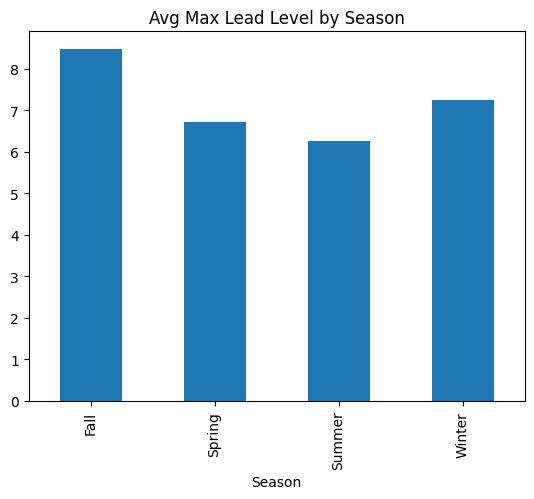

In [23]:
df.groupby('Season')['Max'].mean().plot(kind='bar', title='Avg Max Lead Level by Season')

# Step 3: Seasonal Trend Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Set plot style
sns.set(style="whitegrid")

<ipython-input-26-240a5a5f09ff>:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


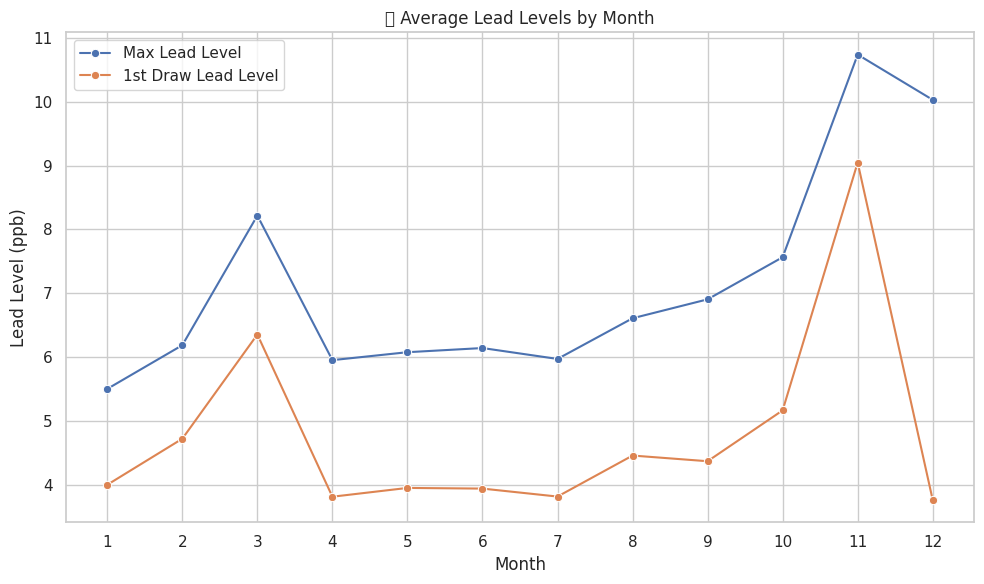

In [26]:
# --- 1. Average Lead Levels by Month (across all years)
monthly_avg = df.groupby('Month')[['1st Draw', 'Max']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Max', marker='o', label='Max Lead Level')
sns.lineplot(data=monthly_avg, x='Month', y='1st Draw', marker='o', label='1st Draw Lead Level')
plt.title("📈 Average Lead Levels by Month")
plt.xlabel("Month")
plt.ylabel("Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-27-fbe9a71e09b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Max', palette='coolwarm')
<ipython-input-27-fbe9a71e09b2>:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


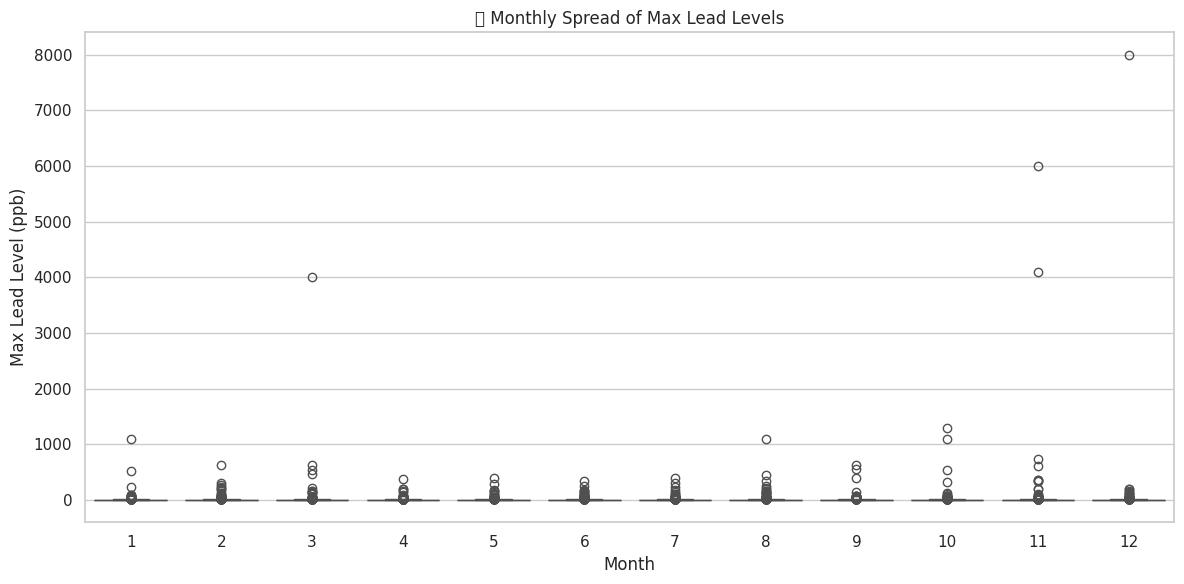

In [27]:
# --- 2. Boxplot of Lead Levels by Month (shows spread & outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Max', palette='coolwarm')
plt.title("📦 Monthly Spread of Max Lead Levels")
plt.xlabel("Month")
plt.ylabel("Max Lead Level (ppb)")
plt.tight_layout()
plt.show()


<ipython-input-28-a5e44a141029>:12: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


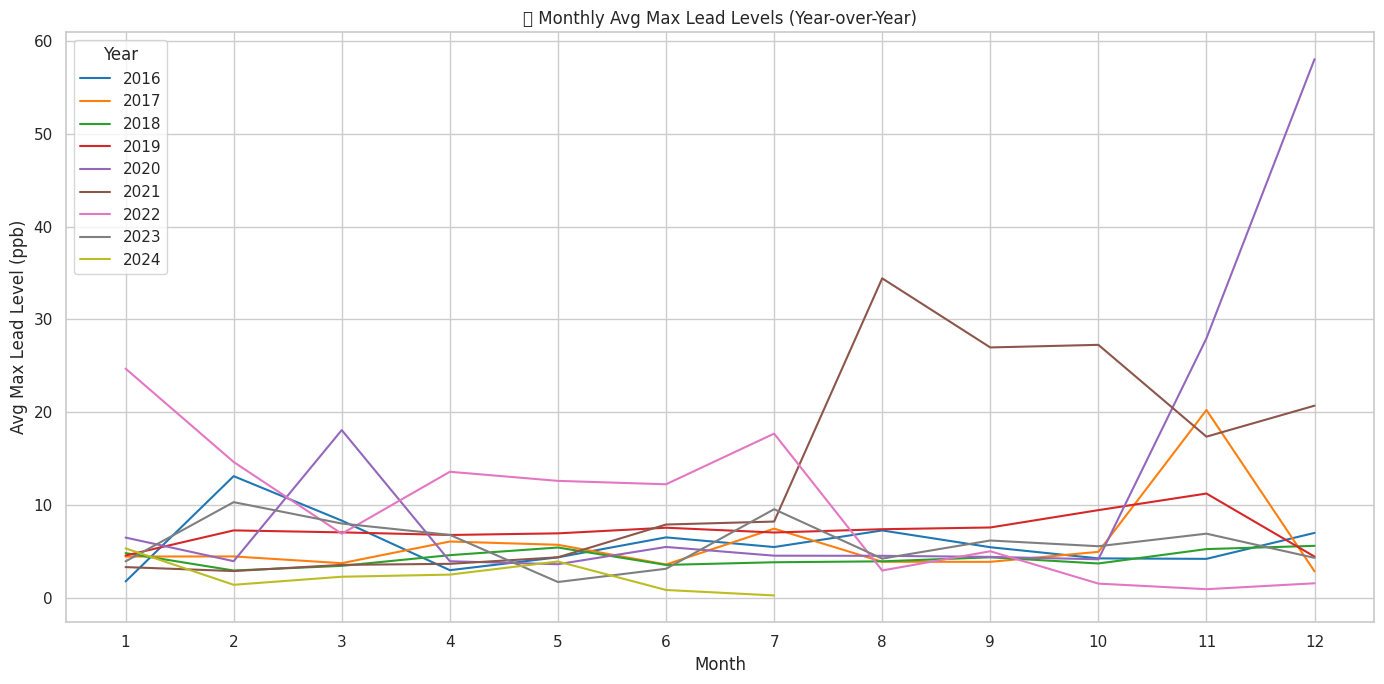

In [28]:
# --- 3. Year-over-Year Monthly Trends (Seasonal Line Chart)
monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].mean().reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("📆 Monthly Avg Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Step 4: Geospatial Visualization

In [29]:
import folium
from folium.plugins import HeatMap

In [30]:
# --- Basic map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='CartoDB positron')


In [31]:
# --- Clean points for heatmap
heat_data = df[['Latitude', 'Longitude', 'Max']].dropna()
heat_data = heat_data[(heat_data['Latitude'] != 0) & (heat_data['Longitude'] != 0)]


In [32]:
# Normalize lead levels for intensity
heat_points = heat_data.apply(lambda row: [row['Latitude'], row['Longitude'], row['Max']], axis=1).tolist()


In [33]:
# --- Add heat layer
HeatMap(heat_points, radius=12, blur=15, max_zoom=1).add_to(m)


In [34]:
# Display
m

# Step 5:Patterns by neighbourhood, zip and ward

<ipython-input-35-281c39a3dc6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
<ipython-input-35-281c39a3dc6b>:10: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


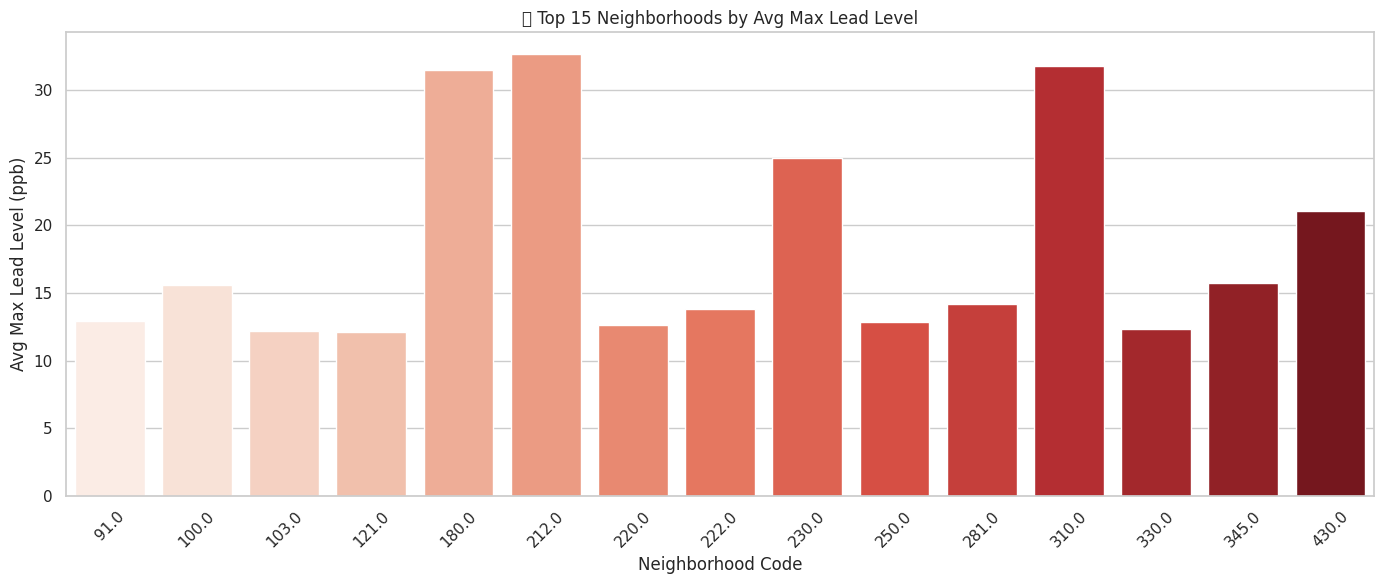

In [35]:
# Group by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("🏘️ Top 15 Neighborhoods by Avg Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-36-fc8d460c2f56>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
<ipython-input-36-fc8d460c2f56>:11: UserWarning: Glyph 128238 (\N{POSTBOX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128238 (\N{POSTBOX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


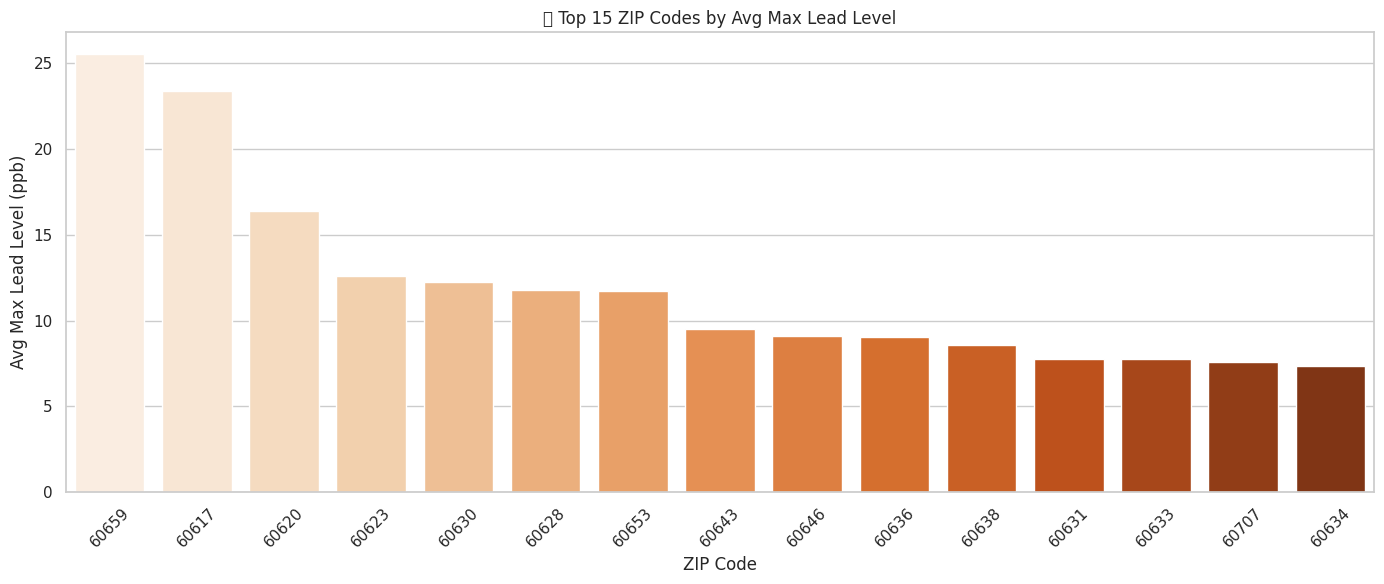

In [36]:
# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("📮 Top 15 ZIP Codes by Avg Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-37-1d103d7b148b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
<ipython-input-37-1d103d7b148b>:8: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


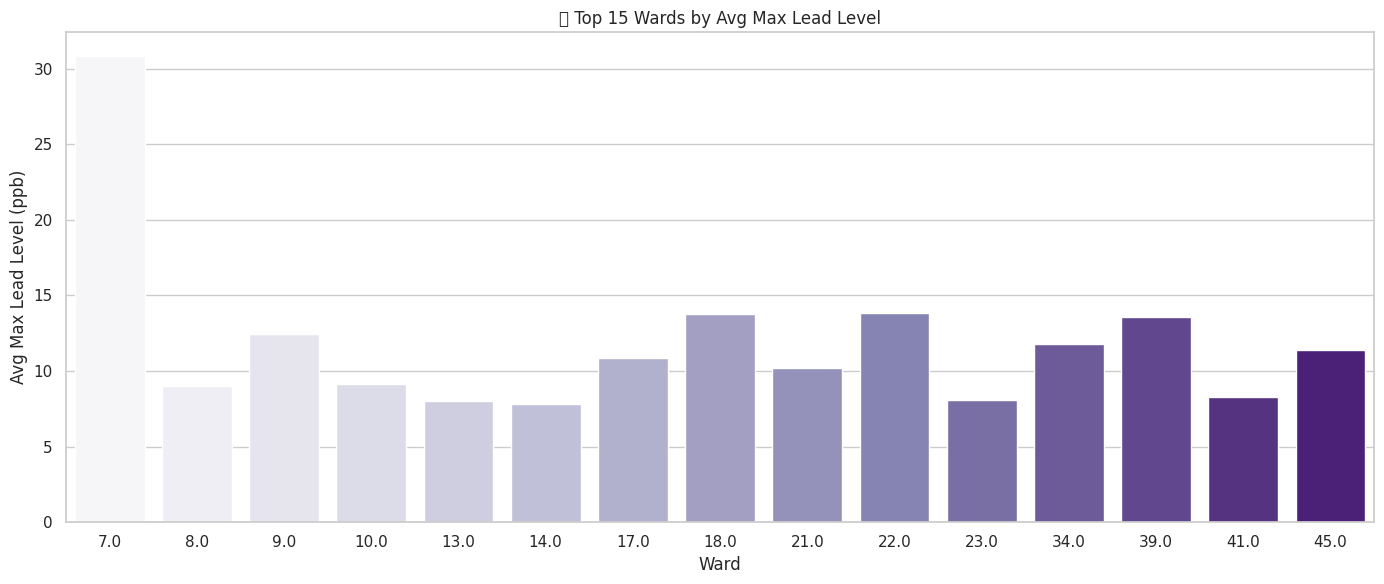

In [37]:
ward_avg = df.groupby('ward')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("🏛️ Top 15 Wards by Avg Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.tight_layout()
plt.show()
